In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [ ]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/climate/Rainfall.csv')
data.head()


Station  Jan   Feb   Mar    Apr    May   June   July    Aug    Sep  \
0       Dhaka  0.0   0.0  20.0  123.0  235.0  314.0  356.0  409.0  207.0   
1     Tangail  3.0   0.0  48.0   68.0  198.0  303.0  259.0    NaN    NaN   
2  Mymensingh  1.0  12.0  32.0   80.0  239.0  449.0  333.0  741.0  242.0   
3    Faridpur  0.0   0.0  17.0  109.0  163.0  383.0  253.0  469.0  113.0   
4   Madaripur  0.0   1.0  20.0  101.0  169.0  408.0  342.0  380.0  131.0   

     Oct  Nov  Dec    Year  
0  112.0  0.0  0.0  148.00  
1    NaN  0.0  0.0   97.67  
2   18.0  0.0  0.0  178.92  
3    2.0  0.0  0.0  125.75  
4   61.0  0.0  0.0  134.42

In [ ]:
# Check for null values in each column
null_values = data.isnull().sum()

# Display columns with their null value counts
print("\nNull values in each column:")
print(null_values)


Null values in each column:
Station    0
Jan        8
Feb        1
Mar        1
Apr        1
May        1
June       1
July       1
Aug        4
Sep        6
Oct        7
Nov        1
Dec        3
Year       0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/climate/Rainfall.csv')

# Convert 'Station' column from categorical to numerical using label encoding
label_encoder = LabelEncoder()
data['Station'] = label_encoder.fit_transform(data['Station'])

# Fill null values with the median of each column
data_filled = data.fillna(data.median())

# Save the modified dataset to a new CSV file
data_filled.to_csv('/content/drive/MyDrive/climate/Rainfall1.csv', index=False)

print("The 'Station' column has been label encoded, null values filled with the median, and the file has been saved as 'Maximum1.csv'.")


The 'Station' column has been label encoded, null values filled with the median, and the file has been saved as 'Maximum1.csv'.


In [ ]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/climate/Rainfall1.csv')
data.head()


Station  Jan   Feb   Mar    Apr    May   June   July    Aug    Sep    Oct  \
0       33  0.0   0.0  20.0  123.0  235.0  314.0  356.0  409.0  207.0  112.0   
1      128  3.0   0.0  48.0   68.0  198.0  303.0  259.0  381.0  272.0  171.0   
2       86  1.0  12.0  32.0   80.0  239.0  449.0  333.0  741.0  242.0   18.0   
3       41  0.0   0.0  17.0  109.0  163.0  383.0  253.0  469.0  113.0    2.0   
4       78  0.0   1.0  20.0  101.0  169.0  408.0  342.0  380.0  131.0   61.0   

   Nov  Dec    Year  
0  0.0  0.0  148.00  
1  0.0  0.0   97.67  
2  0.0  0.0  178.92  
3  0.0  0.0  125.75  
4  0.0  0.0  134.42

In [ ]:
X = data.drop(['Year'], axis=1)
y = data['Year']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)


     Station  Jan    Feb    Mar    Apr    May   June   July    Aug    Sep  \
0         33  0.0    0.0   20.0  123.0  235.0  314.0  356.0  409.0  207.0   
1        128  3.0    0.0   48.0   68.0  198.0  303.0  259.0  381.0  272.0   
2         86  1.0   12.0   32.0   80.0  239.0  449.0  333.0  741.0  242.0   
3         41  0.0    0.0   17.0  109.0  163.0  383.0  253.0  469.0  113.0   
4         78  0.0    1.0   20.0  101.0  169.0  408.0  342.0  380.0  131.0   
..       ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
428       92  0.0   13.0  195.0   25.0  122.0  488.0  293.0  180.0  325.0   
429       89  0.0    0.0   42.0   45.0   63.0  363.0  214.0  441.0  204.0   
430       82  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
431        2  0.0    0.0   70.0   36.0  143.0  123.0  134.0  349.0  142.0   
432       69  0.0  133.0  203.0  447.0  397.0  365.0  188.0   56.0    0.0   

       Oct   Nov   Dec  
0    112.0   0.0   0.0  
1    171.0   0.0   0.0  


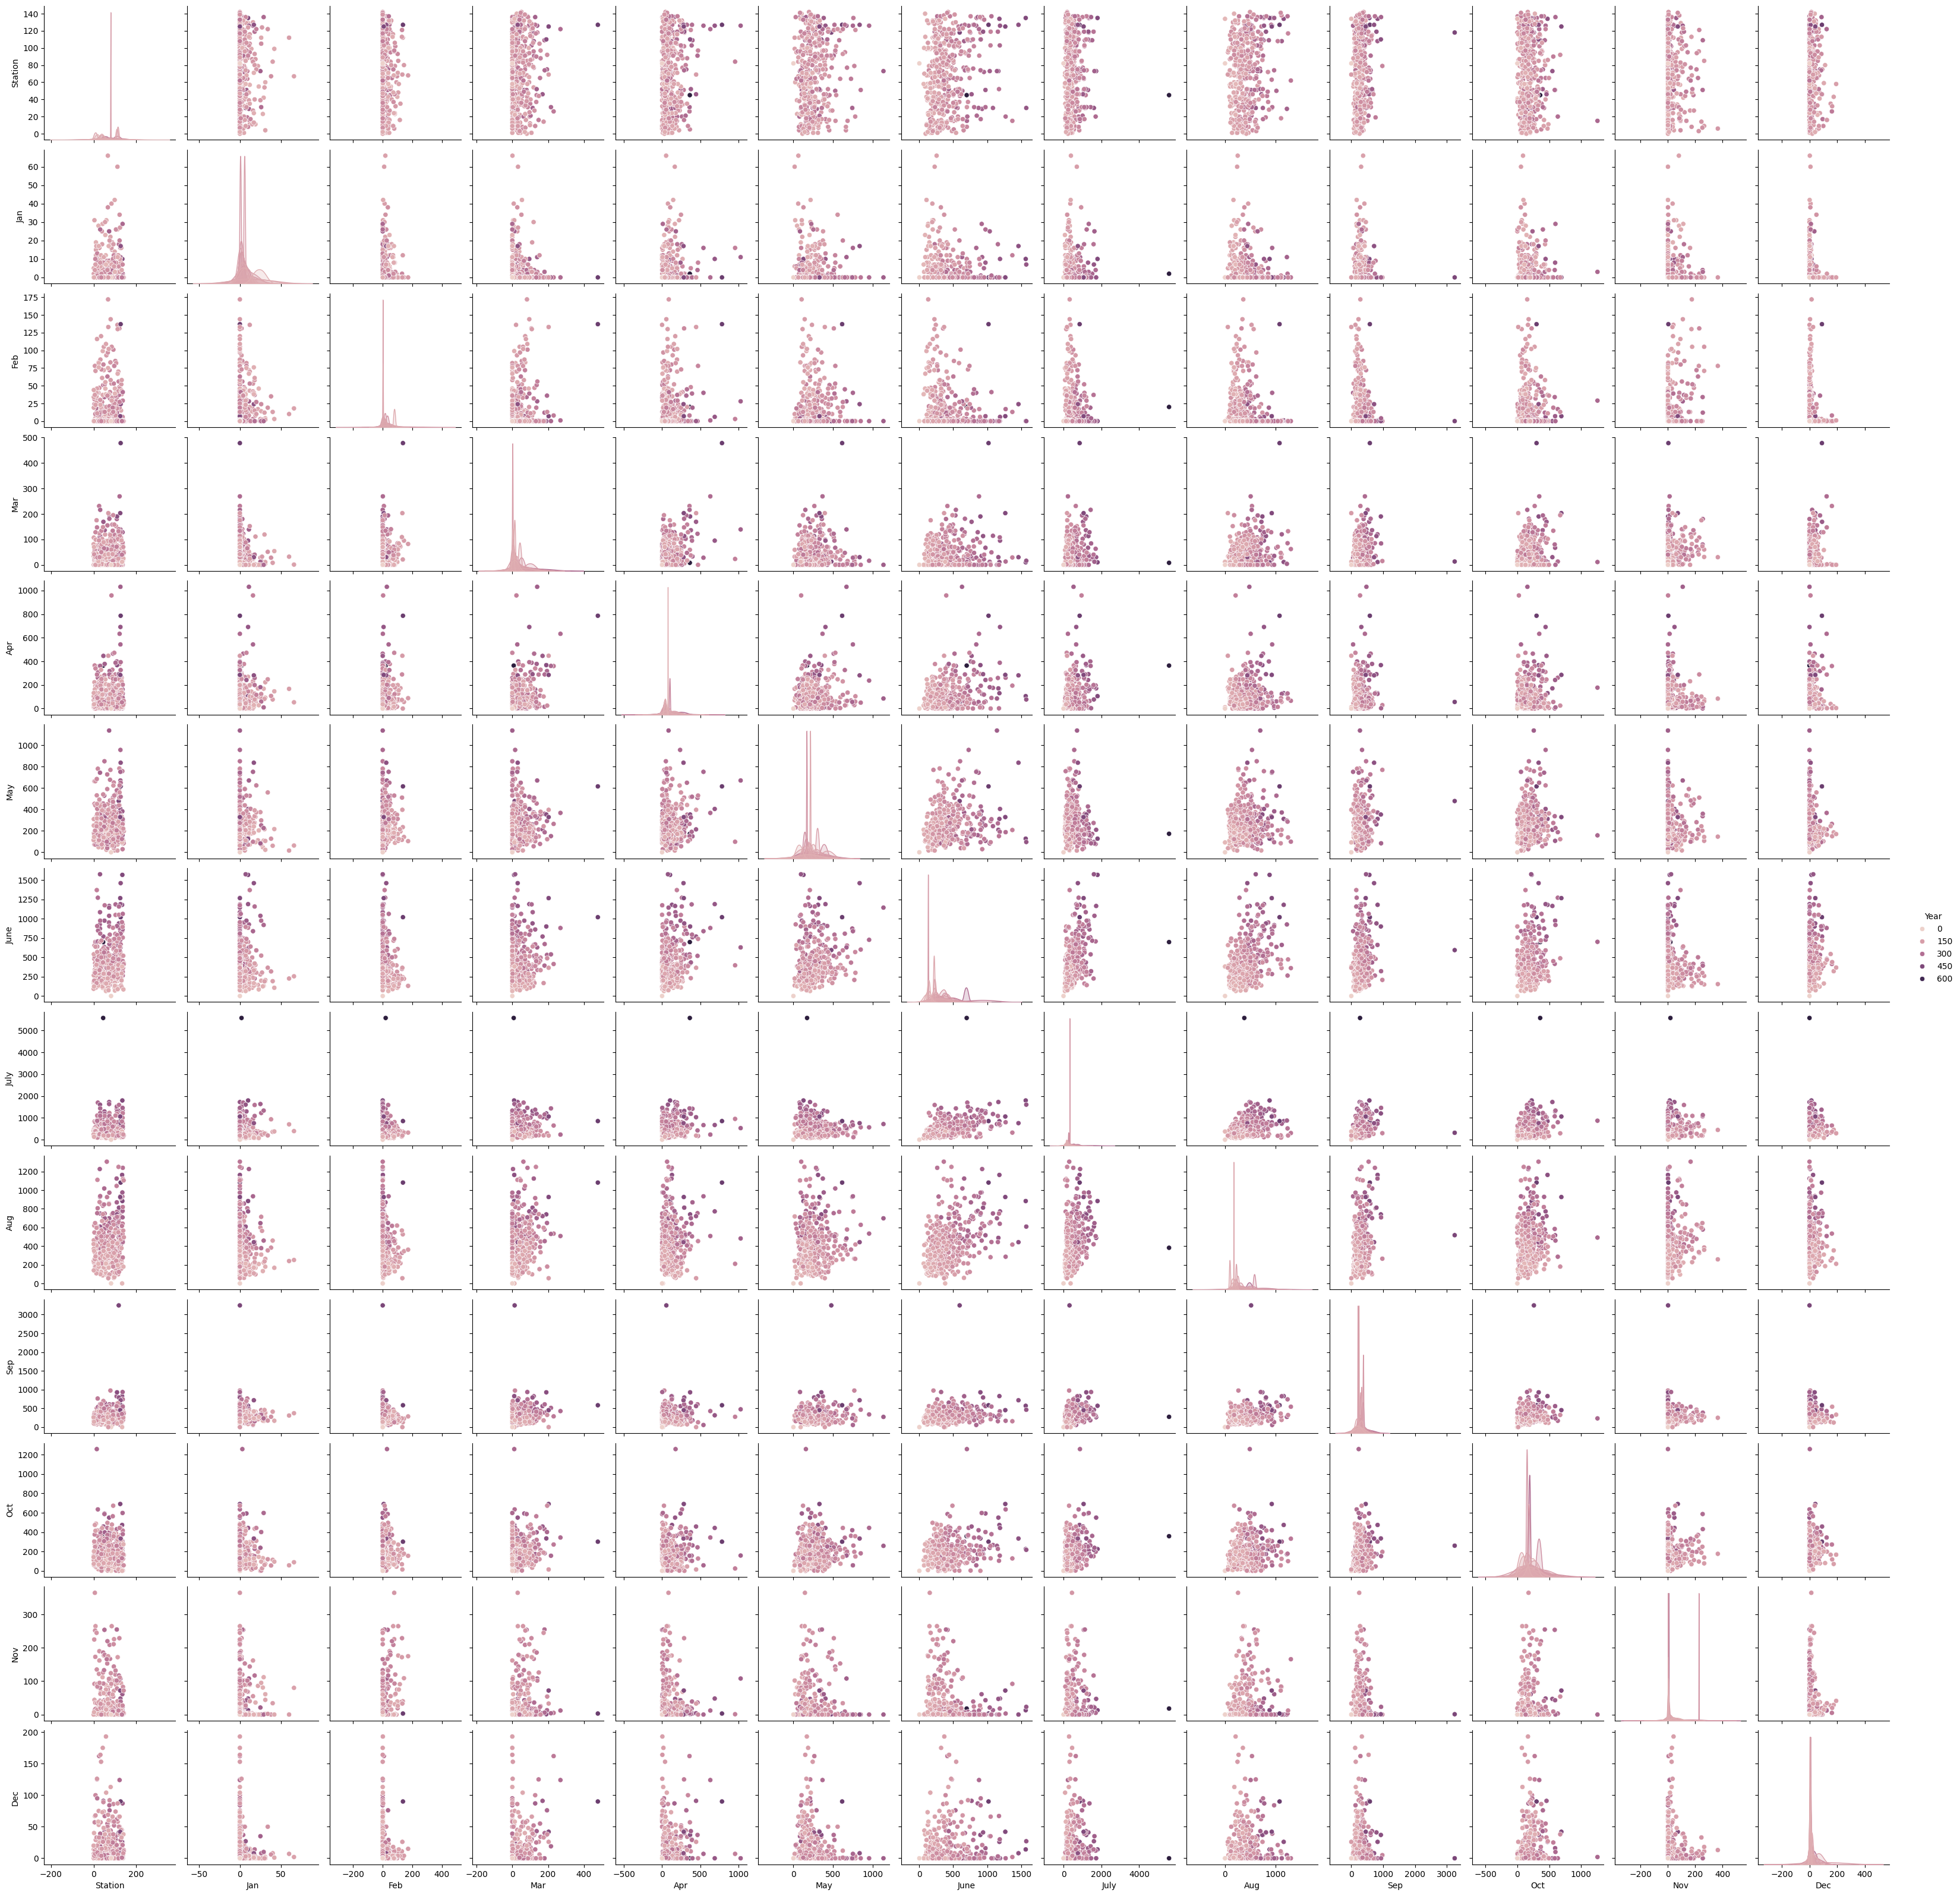

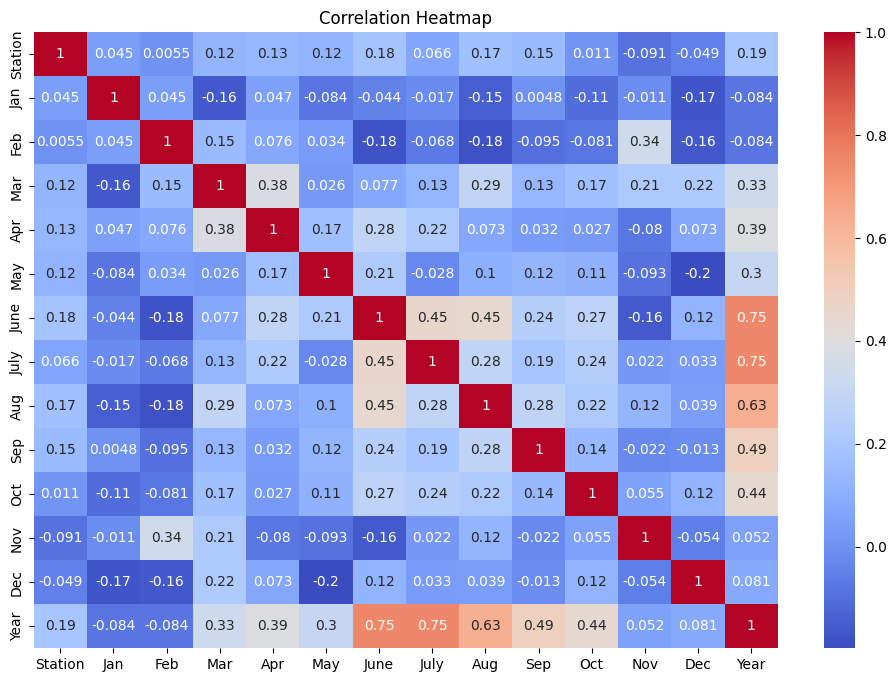

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font family to a font available on your system
plt.rcParams['font.family'] = 'sans-serif'

# Let's explore the dataset by visualizing the distributions and relationships between variables
sns.pairplot(data, hue='Year')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

Cross-Validation RMSE Scores: [31.43617435 27.20614809 58.03981838 35.27507932 22.28527451]
Mean Cross-Validation RMSE: 34.84849893032903


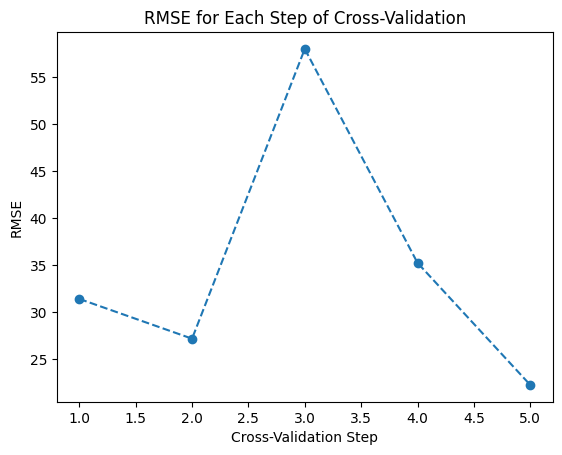

In [ ]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Predict on the test set
y_pred_test = rf_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 386.1789112486205
Mean Absolute Error: 13.73687011494252


In [ ]:
# Predict on the validation set
y_pred_val = rf_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 457.6269618982858
Validation Mean Absolute Error: 16.54797714285714


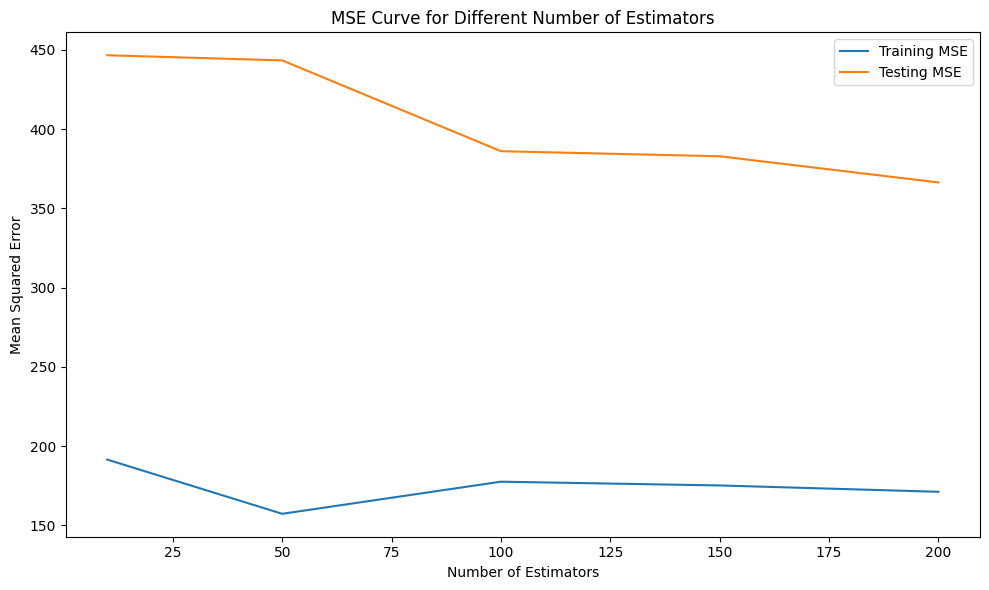

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of number of trees (estimators)
num_estimators = [10, 50, 100, 150, 200]

train_errors = []
test_errors = []



for n in num_estimators:
    # Train the random forest regression model
    model = RandomForestRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


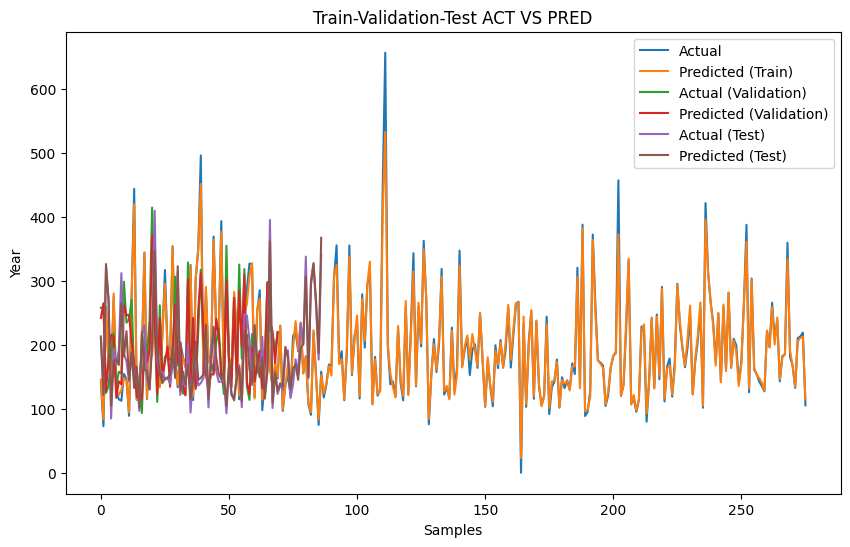

In [ ]:
# Calculate the training set predictions
y_pred_train = rf_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Plot the train-test-validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Year')
plt.title('Train-Validation-Test ACT VS PRED')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate Random Forest Regressor with a specific number of estimators
forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)  # Import r2_score from sklearn.metrics
rmsle = np.sqrt(np.mean(np.log1p(forest_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - forest_pred) / y_test)) * 100

print(f"\nRandom Forest Regressor Model with {num_estimators} Estimators:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Random Forest Regressor Model with 100 Estimators:
Mean Absolute Error (MAE): 13.89
Mean Squared Error (MSE): 388.35
Root Mean Squared Error (RMSE): 19.71
R-squared (R2): 0.91
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 7.69%


Cross-Validation RMSE Scores: [5.52724775 6.03289456 5.14964178 3.80991299 3.64434184]
Mean Cross-Validation RMSE: 4.832807784508647


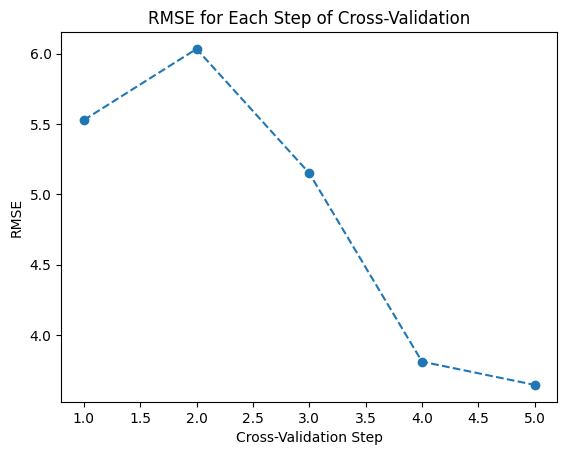

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Create and fit the linear regression model
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

# Perform cross-validation for RMSE
cv_scores = cross_val_score(lr_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Calculate RMSE from negative MSE

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [ ]:
# Predict on the test set using the Linear Regression model
y_pred_test = lr_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 15.225294493902748
Mean Absolute Error: 1.4683721293521017


In [ ]:
# Predict on the validation set using the Linear Regression model
y_pred_val = lr_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 8.832330570123737
Validation Mean Absolute Error: 0.9448772179417265


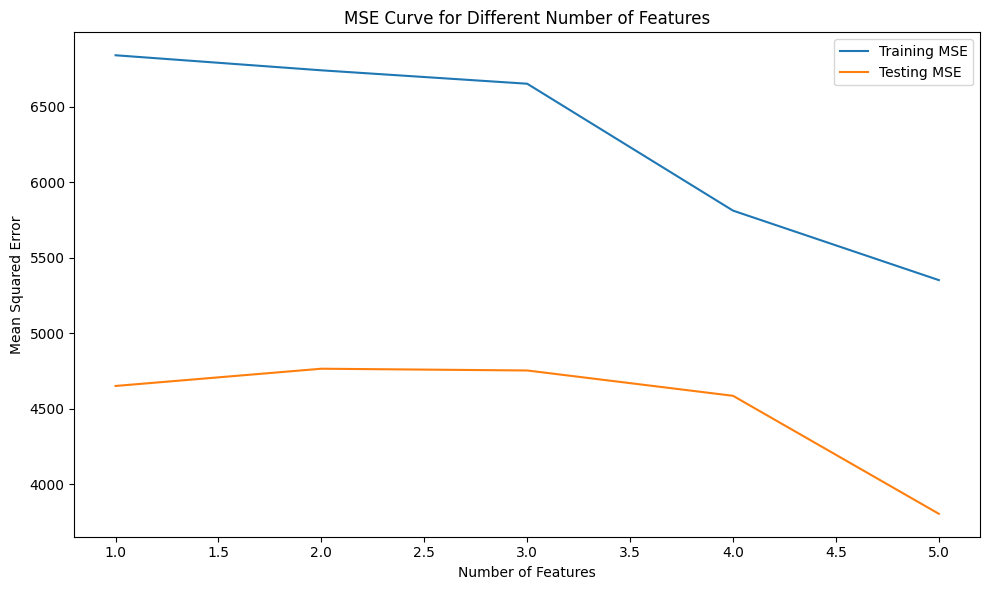

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of numbers of features (attributes)
num_features = [1, 2, 3, 4, 5]

train_errors = []
test_errors = []

for n in num_features:
    # Select the first 'n' features for training and testing
    X_train_subset = X_train.iloc[:, :n]
    X_test_subset = X_test.iloc[:, :n]

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train_subset, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test_subset)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_errors, label='Training MSE')
plt.plot(num_features, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


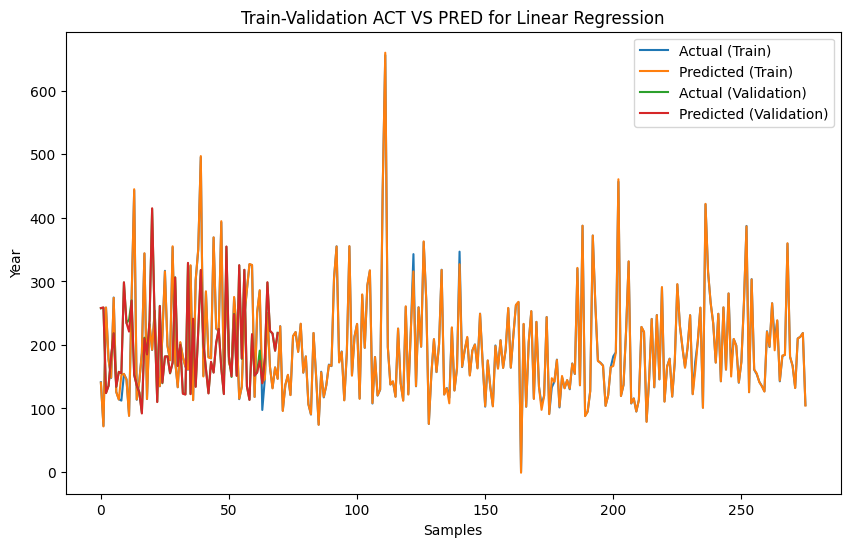

In [ ]:
# Calculate the training set predictions for Linear Regression
y_pred_train_lr = lr_regressor.predict(X_train)

# Calculate the training set mean squared error for Linear Regression
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)

# Calculate the validation set predictions for Linear Regression
y_pred_val_lr = lr_regressor.predict(X_val)

# Plot the train-validation loss curves for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train_lr)), y_pred_train_lr, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val_lr)), y_pred_val_lr, label='Predicted (Validation)')
plt.xlabel('Samples')
plt.ylabel('Year')
plt.title('Train-Validation ACT VS PRED for Linear Regression')
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate a Linear Regression model
lr_model = LinearRegression(fit_intercept=True, copy_X=True)  # Specifying hyperparameters
lr_model.fit(X_train, y_train_noisy)  # Fit on the noisy target

# Predict using the trained model
lr_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr_pred)
rmsle = np.sqrt(np.mean((np.log1p(lr_pred) - np.log1p(y_test)) ** 2))
mape = np.mean(np.abs((y_test - lr_pred) / y_test)) * 100

# Print the evaluation metrics
print(f"\nLinear Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Linear Regression Model:
Mean Absolute Error (MAE): 3.65
Mean Squared Error (MSE): 38.20
Root Mean Squared Error (RMSE): 6.18
R-squared (R2): 0.99
Root Mean Squared Logarithmic Error (RMSLE): 0.03
Mean Absolute Percentage Error (MAPE): 2.02%


Cross-Validation RMSE Scores: [6.3960778  6.54093044 5.10538602 4.04979487 4.05445721]
Mean Cross-Validation RMSE: 5.229329269584279


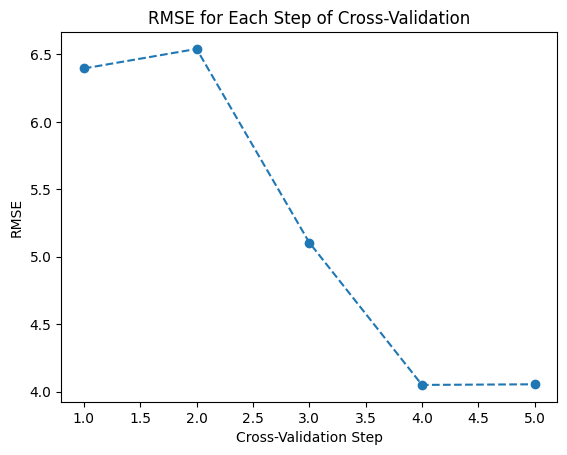

In [ ]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

lasso_cv = LassoCV()
lasso_cv.fit(X_train, y_train)
cv_scores = cross_val_score(lasso_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [ ]:
# Predict on the test set
y_pred_test = lasso_cv.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 17.973545283379355
Mean Absolute Error: 2.1307439427282335


In [ ]:
# Predict on the validation set
y_pred_val = lasso_cv.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 10.779436924462875
Validation Mean Absolute Error: 1.6214788413474224


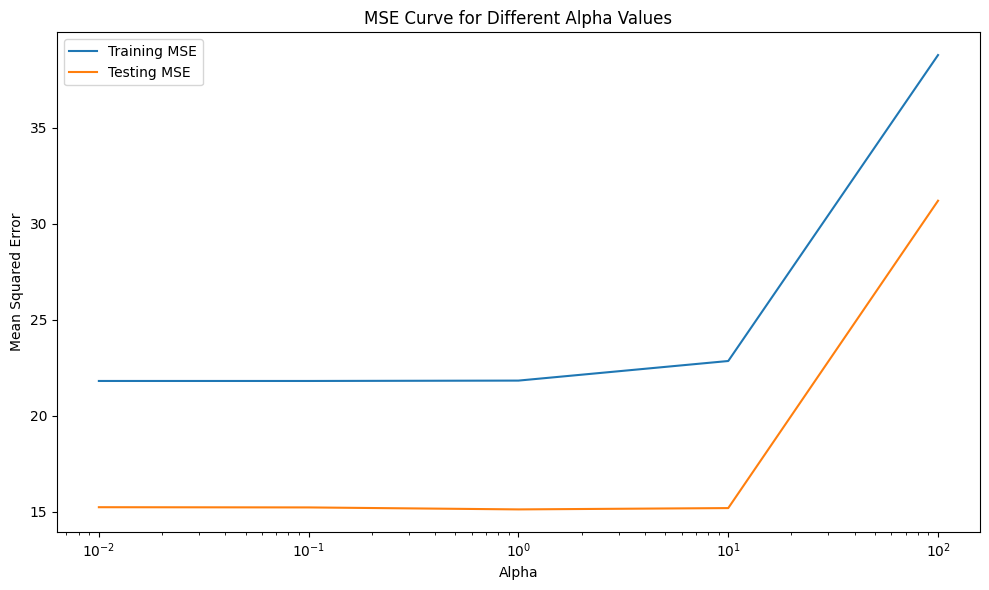

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of alphas
alphas = [0.01, 0.1, 1, 10, 100]

train_errors = []
test_errors = []

for alpha in alphas:
    # Train the Lasso regression model
    model = LassoCV(alphas=[alpha], cv=5)  # LassoCV automatically selects the best alpha through cross-validation
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Training MSE')
plt.plot(alphas, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Alpha Values')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.xscale('log')  # Since alphas are on a logarithmic scale
plt.legend()
plt.tight_layout()
plt.show()


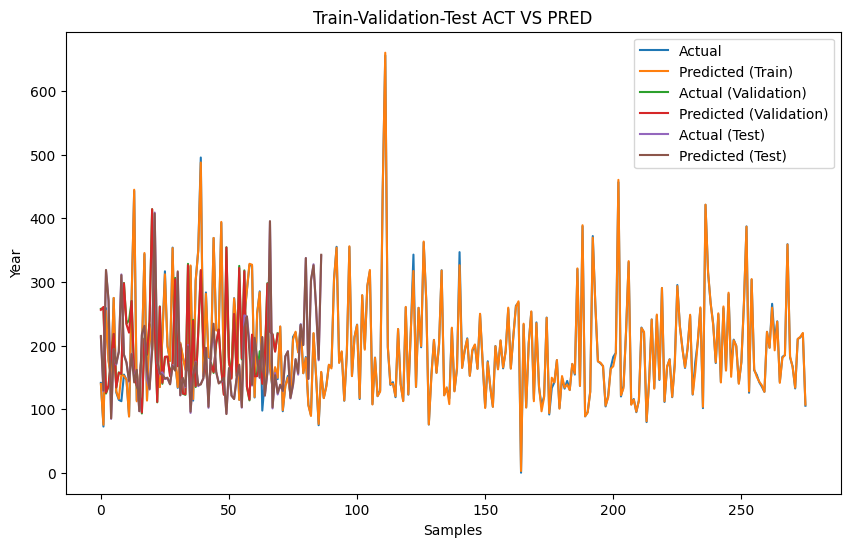

In [ ]:
# Calculate the training set predictions
y_pred_train = lasso_cv.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Year')
plt.title('Train-Validation-Test ACT VS PRED')
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameters
cv_value = 5  # Cross-validation value

# Create and evaluate LassoCV model with hyperparameters and noisy data
lasso_cv = LassoCV(cv=cv_value)
lasso_cv.fit(X_train, y_train_noisy)  # Fit on noisy target data
lasso_pred = lasso_cv.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, lasso_pred)
mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_pred)
rmsle = np.sqrt(np.mean((np.log1p(lasso_pred) - np.log1p(y_test)) ** 2))
mape = np.mean(np.abs((y_test - lasso_pred) / y_test)) * 100

# Print the evaluation metrics
print(f"\nLassoCV Model with Noisy Target:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



LassoCV Model with Noisy Target:
Mean Absolute Error (MAE): 4.30
Mean Squared Error (MSE): 35.18
Root Mean Squared Error (RMSE): 5.93
R-squared (R2): 0.99
Root Mean Squared Logarithmic Error (RMSLE): 0.03
Mean Absolute Percentage Error (MAPE): 2.32%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_

Cross-Validation RMSE Scores: [13.51445188 13.45353731  9.08115815  8.53252453  8.27024831]
Mean Cross-Validation RMSE: 10.570384036273996


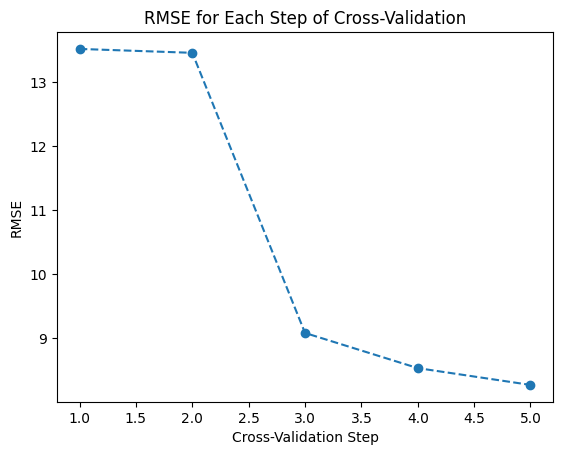

In [ ]:
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

huber_regressor = HuberRegressor(max_iter=n)
huber_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(huber_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the test set using Huber Regression
y_pred_test = huber_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 77.63884577249719
Mean Absolute Error: 6.703314881551924


In [ ]:
# Predict on the validation set using Huber Regression
y_pred_val = huber_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 114.11904774031392
Validation Mean Absolute Error: 8.030641243867283


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_

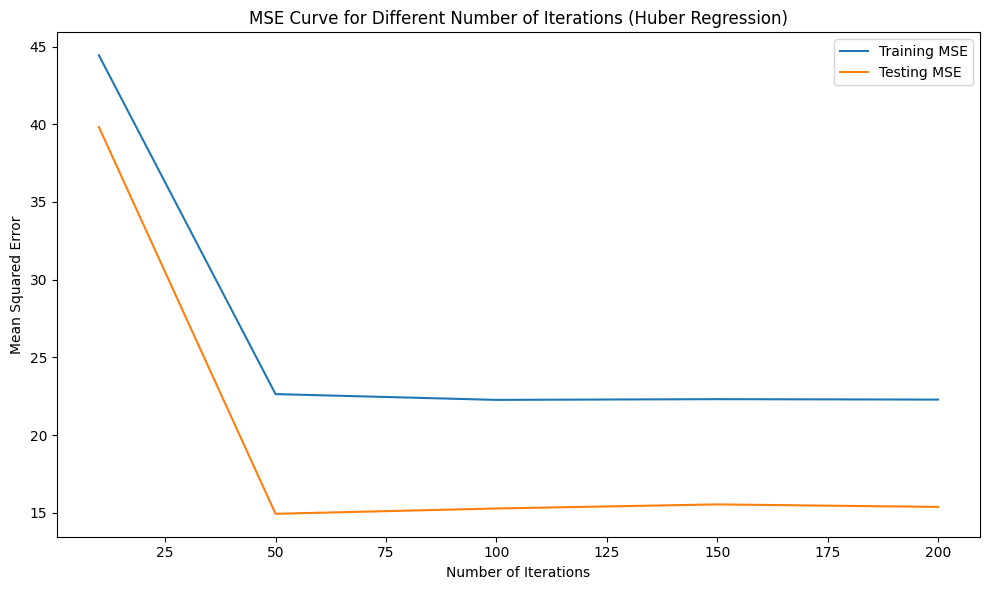

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of number of iterations
num_iterations = [10, 50, 100, 150, 200]

train_errors = []
test_errors = []

for n in num_iterations:
    # Train the Huber regression model
    model = HuberRegressor(max_iter=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_iterations, train_errors, label='Training MSE')
plt.plot(num_iterations, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Iterations (Huber Regression)')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


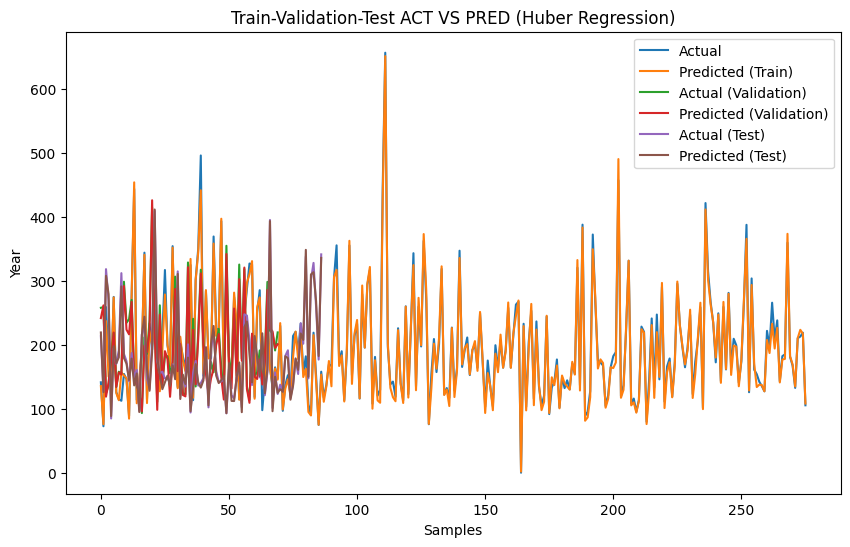

In [ ]:
# Calculate the training set predictions using Huber Regression
y_pred_train = huber_regressor.predict(X_train)

# Calculate the training set mean squared error for Huber Regression
mse_train = mean_squared_error(y_train, y_pred_train)

# Plot the train-test-validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Year')
plt.title('Train-Validation-Test ACT VS PRED (Huber Regression)')
plt.legend()
plt.show()


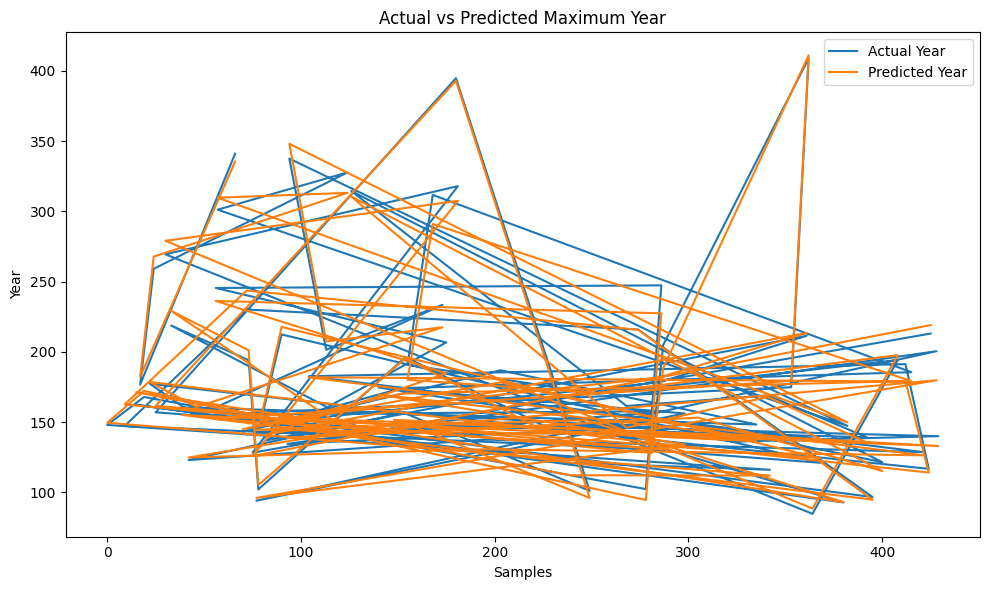

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set using Huber Regression
y_pred = huber_regressor.predict(X_test)

# Create a DataFrame with actual and predicted olive influx values
rent_comparison = pd.DataFrame({'Actual Year': y_test, 'Predicted Year': y_pred})

# Plot the actual versus predicted olive influx values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Maximum Year")
plt.plot(rent_comparison.index, rent_comparison['Actual Year'], label='Actual Year')
plt.plot(rent_comparison.index, rent_comparison['Predicted Year'], label='Predicted Year')
plt.xlabel("Samples")
plt.ylabel("Year")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameters
epsilon_value = 1.35  # Example value, adjust as needed


# Create and evaluate Huber Regressor model with hyperparameters
huber_reg = HuberRegressor(epsilon=epsilon_value)


# Predict using the trained model
huber_pred = huber_reg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, huber_pred)
mse = mean_squared_error(y_test, huber_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, huber_pred)
rmsle = np.sqrt(np.mean((np.log1p(huber_pred) - np.log1p(y_test)) ** 2))
mape = np.mean(np.abs((y_test - huber_pred) / y_test)) * 100

# Print the evaluation metrics
print(f"\nHuber Regressor Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Huber Regressor Model:
Mean Absolute Error (MAE): 5.29
Mean Squared Error (MSE): 54.31
Root Mean Squared Error (RMSE): 7.37
R-squared (R2): 0.99
Root Mean Squared Logarithmic Error (RMSLE): 0.04
Mean Absolute Percentage Error (MAPE): 2.86%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameters for KNN
n_neighbors_value = 5  # Example value, adjust as needed

# Create and evaluate KNeighborsRegressor model with hyperparameters
knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors_value)
knn_reg.fit(X_train, y_train)  # Fit the model on the training data

# Predict using the trained KNN model
knn_pred = knn_reg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
rmsle = np.sqrt(np.mean((np.log1p(knn_pred) - np.log1p(y_test)) ** 2))
mape = np.mean(np.abs((y_test - knn_pred) / y_test)) * 100

# Print the evaluation metrics
print(f"\nKNeighbors Regressor Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNeighbors Regressor Model:
Mean Absolute Error (MAE): 12.73
Mean Squared Error (MSE): 372.66
Root Mean Squared Error (RMSE): 19.30
R-squared (R2): 0.92
Root Mean Squared Logarithmic Error (RMSLE): 0.08
Mean Absolute Percentage Error (MAPE): 6.41%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam



# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the target variable (convert to numpy array before reshaping)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()  # Flatten to 1D
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Build an improved ANN model with more hidden layers and regularization
model = Sequential()

# Input Layer
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden Layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout to reduce overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='linear'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=300, batch_size=16, validation_split=0.2, verbose=1)

# Predictions and inverse scaling
ann_pred_scaled = model.predict(X_test_scaled)
ann_pred = scaler_y.inverse_transform(ann_pred_scaled)  # This returns a 2D array

# Flatten the predictions to ensure they are 1D
ann_pred = ann_pred.flatten()

# Performance evaluation
mae = mean_absolute_error(y_test, ann_pred)
mse = mean_squared_error(y_test, ann_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ann_pred)
rmsle = np.sqrt(np.mean((np.log1p(ann_pred) - np.log1p(y_test)) ** 2))  # Corrected RMSLE calculation
mape = np.mean(np.abs((y_test - ann_pred) / y_test)) * 100

print(f"\nImproved ANN Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1.2563 - mae: 0.8534 - val_loss: 0.3980 - val_mae: 0.4950
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5925 - mae: 0.6103 - val_loss: 0.2222 - val_mae: 0.3726
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4242 - mae: 0.5367 - val_loss: 0.1398 - val_mae: 0.2831
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2577 - mae: 0.3929 - val_loss: 0.0922 - val_mae: 0.2333
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1569 - mae: 0.3175 - val_loss: 0.0558 - val_mae: 0.1836
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1557 - mae: 0.3017 - val_loss: 0.0387 - val_mae: 0.1512
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1258 - mae: 0.2664 - val_loss: 0.0368 - val_mae: 0.1552
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1475 - mae: 0.2931 - val_loss: 0.0323 - val_mae: 0.1456
Epoch 9/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1993 - mae: 0.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Define Huber loss function
def huber_loss(delta=1.0):
    def loss(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= delta
        return tf.where(is_small_error,
                        0.5 * tf.square(error),
                        delta * (tf.abs(error) - 0.5 * delta))
    return loss

# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the target variable (convert to numpy array before reshaping)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()  # Flatten to 1D
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Build an improved ANN model with more hidden layers and regularization
model = Sequential()

# Input Layer
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden Layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout to reduce overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='linear'))

# Compile the model with the Huber loss function
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss=huber_loss(delta=1.0), metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=200, batch_size=16, validation_split=0.2, verbose=1)

# Predictions and inverse scaling
ann_pred_scaled = model.predict(X_test_scaled)
ann_pred = scaler_y.inverse_transform(ann_pred_scaled)  # This returns a 2D array

# Flatten the predictions to ensure they are 1D
ann_pred = ann_pred.flatten()

# Performance evaluation for the ANN model
mae = mean_absolute_error(y_test, ann_pred)
mse = mean_squared_error(y_test, ann_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ann_pred)
rmsle = np.sqrt(np.mean((np.log1p(ann_pred) - np.log1p(y_test)) ** 2))  # Corrected RMSLE calculation
mape = np.mean(np.abs((y_test - ann_pred) / y_test)) * 100

print(f"\nImproved ANN Model with Huber Loss:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Combine predictions with Huber Regressor
# Assuming `huber_pred` is already calculated from your earlier code
# You may want to recalculate huber_pred here if needed
# For example:
huber_reg = HuberRegressor(epsilon=1.35)
huber_reg.fit(X_train, y_train)
huber_pred = huber_reg.predict(X_test)

# Weight optimization for predictions
weight = 0.5  # Set your optimal weight value based on previous evaluations
ensemble_pred = (weight * huber_pred) + ((1 - weight) * ann_pred)

# Performance evaluation for the ensemble model
mae_ensemble = mean_absolute_error(y_test, ensemble_pred)
mse_ensemble = mean_squared_error(y_test, ensemble_pred)
rmse_ensemble = np.sqrt(mse_ensemble)
r2_ensemble = r2_score(y_test, ensemble_pred)
rmsle_ensemble = np.sqrt(np.mean((np.log1p(ensemble_pred) - np.log1p(y_test)) ** 2))  # Corrected RMSLE calculation
mape_ensemble = np.mean(np.abs((y_test - ensemble_pred) / y_test)) * 100

print(f"\nEnsemble Model (Huber Regressor + ANN) with Weight {weight:.2f}:")
print(f"Mean Absolute Error (MAE): {mae_ensemble:.2f}")
print(f"Mean Squared Error (MSE): {mse_ensemble:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ensemble:.2f}")
print(f"R-squared (R2): {r2_ensemble:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle_ensemble:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_ensemble:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3833 - mae: 0.7451 - val_loss: 0.1878 - val_mae: 0.4617
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2634 - mae: 0.5826 - val_loss: 0.0931 - val_mae: 0.3236
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1458 - mae: 0.4242 - val_loss: 0.0460 - val_mae: 0.2247
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1048 - mae: 0.3356 - val_loss: 0.0346 - val_mae: 0.1970
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0690 - mae: 0.2736 - val_loss: 0.0304 - val_mae: 0.1770
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0853 - mae: 0.2943 - val_loss: 0.0225 - val_mae: 0.1441
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0531 - mae: 0.2464 - val_loss: 0.0197 - val_mae: 0.1393
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1014 - mae: 0.3010 - val_loss: 0.0187 - val_mae: 0.1351
Epoch 9/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.08

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Improved ANN Model with Huber Loss:
Mean Absolute Error (MAE): 6.01
Mean Squared Error (MSE): 63.07
Root Mean Squared Error (RMSE): 7.94
R-squared (R2): 0.99
Root Mean Squared Logarithmic Error (RMSLE): 0.04
Mean Absolute Percentage Error (MAPE): 3.41%

Ensemble Model (Huber Regressor + ANN) with Weight 0.50:
Mean Absolute Error (MAE): 3.46
Mean Squared Error (MSE): 26.49
Root Mean Squared Error (RMSE): 5.15
R-squared (R2): 0.99
Root Mean Squared Logarithmic Error (RMSLE): 0.03
Mean Absolute Percentage Error (MAPE): 1.93%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


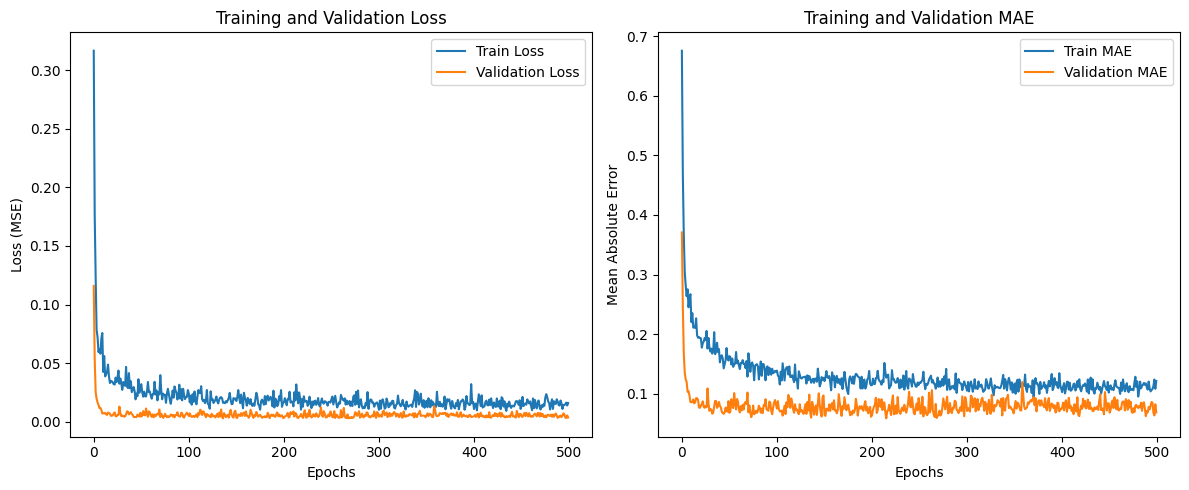

In [ ]:
import matplotlib.pyplot as plt

# After the model training, plot the loss and MAE metrics

# Plot the training and validation loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
